In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import itertools
import wordcloud as wc
import matplotlib.ticker as ticker

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## G3M

In [3]:
df_2009_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2009.csv', index_col=0)
df_2010_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2010.csv', index_col=0)
df_2011_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2011.csv', index_col=0)
df_2012_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2012.csv', index_col=0)
df_2013_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2013.csv', index_col=0)
df_2014_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2014.csv', index_col=0)
df_2015_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2015.csv', index_col=0)
df_2016_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2016.csv', index_col=0)
df_2017_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2017.csv', index_col=0)
df_2018_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2018.csv', index_col=0)
df_2019_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2019.csv', index_col=0)

In [4]:
df_2009_cpc['Claim_length'] = df_2009_cpc['Claim'].str.split().str.len()
df_2010_cpc['Claim_length'] = df_2010_cpc['Claim'].str.split().str.len()
df_2011_cpc['Claim_length'] = df_2011_cpc['Claim'].str.split().str.len()
df_2012_cpc['Claim_length'] = df_2012_cpc['Claim'].str.split().str.len()
df_2013_cpc['Claim_length'] = df_2013_cpc['Claim'].str.split().str.len()
df_2014_cpc['Claim_length'] = df_2014_cpc['Claim'].str.split().str.len()
df_2015_cpc['Claim_length'] = df_2015_cpc['Claim'].str.split().str.len()
df_2016_cpc['Claim_length'] = df_2016_cpc['Claim'].str.split().str.len()
df_2017_cpc['Claim_length'] = df_2017_cpc['Claim'].str.split().str.len()
df_2018_cpc['Claim_length'] = df_2018_cpc['Claim'].str.split().str.len()
df_2019_cpc['Claim_length'] = df_2019_cpc['Claim'].str.split().str.len()


In [5]:
print(df_2009_cpc.shape)
print(df_2010_cpc.shape)
print(df_2011_cpc.shape)
print(df_2012_cpc.shape)
print(df_2013_cpc.shape)
print(df_2014_cpc.shape)
print(df_2015_cpc.shape)
print(df_2016_cpc.shape)
print(df_2017_cpc.shape)
print(df_2018_cpc.shape)
print(df_2019_cpc.shape)


(167315, 6)
(219592, 6)
(224466, 6)
(253023, 6)
(277945, 6)
(301406, 6)
(298545, 6)
(303043, 6)
(318819, 6)
(307741, 6)
(200452, 6)


In [6]:
# df_cpc.shape
# df_2019_cpc = pd.read_csv('/content/drive/MyDrive/classification/cpc_dataset_2010_2020/2019.csv', index_col=0)

In [7]:
df_2009_cpc['cpc_subclass_list'] = df_2009_cpc.cpc_subclass.str.split(",")
df_2010_cpc['cpc_subclass_list'] = df_2010_cpc.cpc_subclass.str.split(",")
df_2011_cpc['cpc_subclass_list'] = df_2011_cpc.cpc_subclass.str.split(",")
df_2012_cpc['cpc_subclass_list'] = df_2012_cpc.cpc_subclass.str.split(",")
df_2013_cpc['cpc_subclass_list'] = df_2013_cpc.cpc_subclass.str.split(",")
df_2014_cpc['cpc_subclass_list'] = df_2014_cpc.cpc_subclass.str.split(",")
df_2015_cpc['cpc_subclass_list'] = df_2015_cpc.cpc_subclass.str.split(",")
df_2016_cpc['cpc_subclass_list'] = df_2016_cpc.cpc_subclass.str.split(",")
df_2017_cpc['cpc_subclass_list'] = df_2017_cpc.cpc_subclass.str.split(",")
df_2018_cpc['cpc_subclass_list'] = df_2018_cpc.cpc_subclass.str.split(",")
df_2019_cpc['cpc_subclass_list'] = df_2019_cpc.cpc_subclass.str.split(",")

In [8]:
df_cpc = pd.concat([df_2009_cpc, df_2010_cpc, df_2011_cpc, df_2012_cpc, df_2013_cpc, df_2014_cpc, df_2015_cpc, df_2016_cpc, df_2017_cpc, df_2018_cpc, df_2019_cpc], axis=0, ignore_index=True)

In [9]:
df_cpc.head()

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list
0,7473268,2009-01-06,Mating insertion instruments for spinal implan...,1. A method for inserting a main body assembly...,"A61B,A61K",114,"[A61B, A61K]"
1,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,"[A61K, C07D, C07H]"
2,7473560,2009-01-06,Steroid hormone analysis by mass spectrometry,1. A method for mass spectrometric analysis of...,"G01N,Y10T",82,"[G01N, Y10T]"
3,7472455,2009-01-06,Portable hairstylists' station and method,1. A portable hair stylists' station having a ...,"A45D,A47L",164,"[A45D, A47L]"
4,7474526,2009-01-06,Electronic apparatus,1. An electronic apparatus comprising: a case;...,"G06F,H01L",121,"[G06F, H01L]"


In [10]:
df_cpc.shape

(2872347, 7)

In [11]:
df_2019_cpc['Date'] = pd.to_datetime(df_2019_cpc['Date'])

In [12]:
df_2019_cpc['Date'].groupby([df_2019_cpc.Date.dt.year, df_2019_cpc.Date.dt.month]).agg('count')

Date  Date
2019  1       28585
      2       24555
      3       24882
      4       33251
      5       28198
      6       27653
      7       33328
Name: Date, dtype: int64

In [13]:
stats_by_year_cpc = pd.DataFrame(index=range(2009,2020,1))

In [14]:
# number of patents per year 
year_2009_cpc = df_2009_cpc.shape[0]
year_2010_cpc = df_2010_cpc.shape[0]
year_2011_cpc = df_2011_cpc.shape[0]
year_2012_cpc = df_2012_cpc.shape[0]
year_2013_cpc = df_2013_cpc.shape[0]
year_2014_cpc = df_2014_cpc.shape[0]
year_2015_cpc = df_2015_cpc.shape[0]
year_2016_cpc = df_2016_cpc.shape[0]
year_2017_cpc = df_2017_cpc.shape[0]
year_2018_cpc = df_2018_cpc.shape[0]
year_2019_cpc = df_2019_cpc.shape[0]


In [15]:
no_of_patent_by_year_cpc = {'2009':year_2009_cpc,
                            '2010':year_2010_cpc,
                            '2011':year_2011_cpc,
                            '2012':year_2012_cpc,
                            '2013':year_2013_cpc,
                            '2014':year_2014_cpc,
                            '2015':year_2015_cpc,
                            '2016':year_2016_cpc,
                            '2017':year_2017_cpc,
                            '2018':year_2018_cpc,
                            '2019':year_2019_cpc}

In [16]:
stats_by_year_cpc['no_of_patent_by_year_cpc'] = no_of_patent_by_year_cpc.values()

In [17]:
stats_by_year_cpc.head(11)

,no_of_patent_by_year_cpc
2009,167315
2010,219592
2011,224466
2012,253023
2013,277945
2014,301406
2015,298545
2016,303043
2017,318819
2018,307741


#### Total number of patents by year

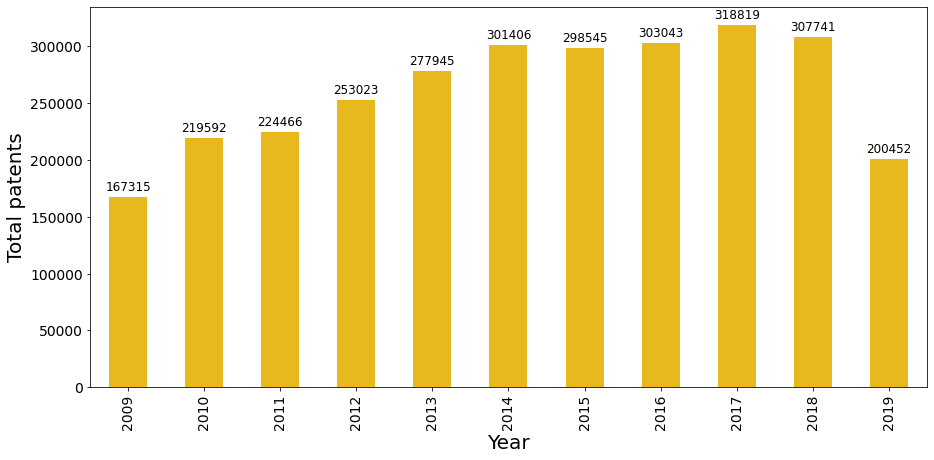

In [18]:
# ax = stats_by_year_cpc.iloc[0:,0].plot(kind='bar', figsize=(15,7), title = 'number of approved patents by year', color='#e8b91e')
# for p in ax.patches:
#   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax = stats_by_year_cpc.iloc[0:,0].plot(kind='bar', figsize=(15,7),  color='#e8b91e', fontsize=14)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total patents", fontsize=20)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_ap_patet_by_year_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_ap_patet_by_year_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  


#### Total number of subclasses by the year

In [19]:
uq_labels_2009_cpc = set(itertools.chain.from_iterable(df_2009_cpc.cpc_subclass_list))
uq_labels_2010_cpc = set(itertools.chain.from_iterable(df_2010_cpc.cpc_subclass_list))
uq_labels_2011_cpc = set(itertools.chain.from_iterable(df_2011_cpc.cpc_subclass_list))
uq_labels_2012_cpc = set(itertools.chain.from_iterable(df_2012_cpc.cpc_subclass_list))
uq_labels_2013_cpc = set(itertools.chain.from_iterable(df_2013_cpc.cpc_subclass_list))
uq_labels_2014_cpc = set(itertools.chain.from_iterable(df_2014_cpc.cpc_subclass_list))
uq_labels_2015_cpc = set(itertools.chain.from_iterable(df_2015_cpc.cpc_subclass_list))
uq_labels_2016_cpc = set(itertools.chain.from_iterable(df_2016_cpc.cpc_subclass_list))
uq_labels_2017_cpc = set(itertools.chain.from_iterable(df_2017_cpc.cpc_subclass_list))
uq_labels_2018_cpc = set(itertools.chain.from_iterable(df_2018_cpc.cpc_subclass_list))
uq_labels_2019_cpc = set(itertools.chain.from_iterable(df_2019_cpc.cpc_subclass_list))

print(len(uq_labels_2011_cpc))

648


In [20]:
no_of_subclass_by_year_cpc = {'2009':len(uq_labels_2009_cpc),
                        '2010':len(uq_labels_2010_cpc),
                        '2011':len(uq_labels_2011_cpc),
                        '2012':len(uq_labels_2012_cpc),
                        '2013':len(uq_labels_2013_cpc),
                        '2014':len(uq_labels_2014_cpc),
                        '2015':len(uq_labels_2015_cpc),
                        '2016':len(uq_labels_2016_cpc),
                        '2017':len(uq_labels_2017_cpc),
                        '2018':len(uq_labels_2018_cpc),
                        '2019':len(uq_labels_2019_cpc)}

In [21]:
stats_by_year_cpc['no_of_subclass_by_year_cpc'] = no_of_subclass_by_year_cpc.values()

In [22]:
stats_by_year_cpc.head(11)

,no_of_patent_by_year_cpc,no_of_subclass_by_year_cpc
2009,167315,645
2010,219592,648
2011,224466,648
2012,253023,650
2013,277945,652
2014,301406,656
2015,298545,654
2016,303043,654
2017,318819,654
2018,307741,655


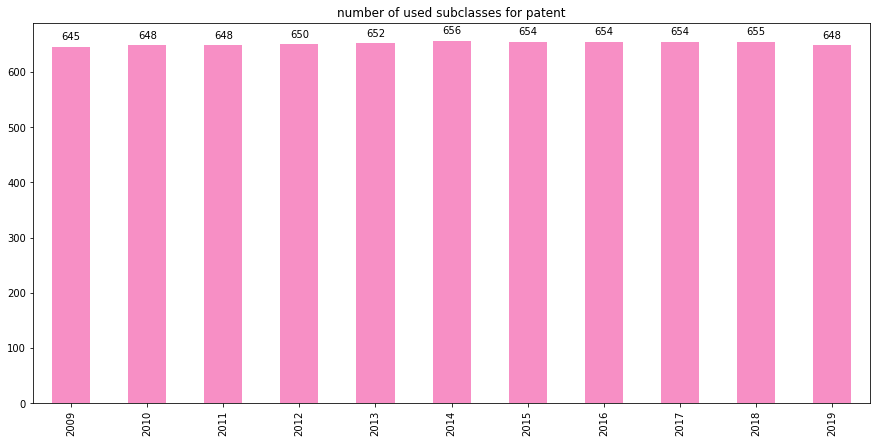

In [23]:
ax = stats_by_year_cpc.iloc[0:,1].plot(kind='bar', figsize=(15,7), title = 'number of used subclasses for patent', color='#f78fc5')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### Average number of patents for the labels by year

In [24]:
stats_by_year_cpc['no_of_avg_labels_per_patent_cpc'] = stats_by_year_cpc['no_of_patent_by_year_cpc'] // stats_by_year_cpc['no_of_subclass_by_year_cpc']

In [25]:
stats_by_year_cpc.head(11)

,no_of_patent_by_year_cpc,no_of_subclass_by_year_cpc,no_of_avg_labels_per_patent_cpc
2009,167315,645,259
2010,219592,648,338
2011,224466,648,346
2012,253023,650,389
2013,277945,652,426
2014,301406,656,459
2015,298545,654,456
2016,303043,654,463
2017,318819,654,487
2018,307741,655,469


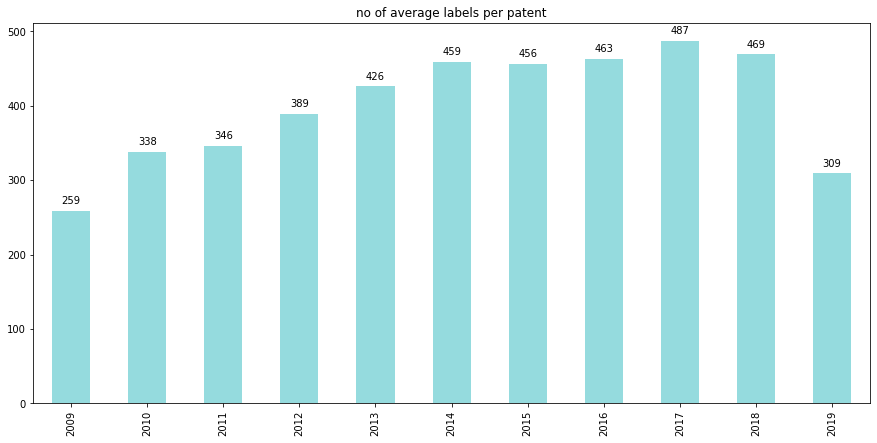

In [26]:
ax = stats_by_year_cpc.iloc[0:,2].plot(kind='bar', figsize=(15,7), title = 'no of average labels per patent', color='#95dbde')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### Finding top repetative subclass cpc labels for the patents 

In [27]:
df_2009_e_cpc = df_2009_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2010_e_cpc = df_2010_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2011_e_cpc = df_2011_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2012_e_cpc = df_2012_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2013_e_cpc = df_2013_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2014_e_cpc = df_2014_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2015_e_cpc = df_2015_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2016_e_cpc = df_2016_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2017_e_cpc = df_2017_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2018_e_cpc = df_2018_cpc.explode('cpc_subclass_list', ignore_index=True)
df_2019_e_cpc = df_2019_cpc.explode('cpc_subclass_list', ignore_index=True)


In [28]:
df_2009_e_cpc.head()

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list
0,7473268,2009-01-06,Mating insertion instruments for spinal implan...,1. A method for inserting a main body assembly...,"A61B,A61K",114,A61B
1,7473268,2009-01-06,Mating insertion instruments for spinal implan...,1. A method for inserting a main body assembly...,"A61B,A61K",114,A61K
2,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,A61K
3,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,C07D
4,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,C07H


In [29]:
top_3_patent_subclass_cpc = {'2009': df_2009_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2010': df_2010_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2011': df_2011_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2012': df_2012_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2013': df_2013_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2014': df_2014_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2015': df_2015_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2016': df_2016_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2017': df_2017_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2018': df_2018_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict(),
                             '2019': df_2019_e_cpc['cpc_subclass_list'].value_counts()[:3].to_dict()}

In [30]:
top_3_patent_subclass_cpc

{'2009': {'G06F': 17527, 'H01L': 14055, 'Y10T': 12914},
 '2010': {'G06F': 23368, 'H01L': 19062, 'Y10T': 18942},
 '2011': {'G06F': 24039, 'H01L': 19435, 'Y10T': 21008},
 '2012': {'G06F': 29475, 'H04L': 20642, 'Y10T': 24047},
 '2013': {'G06F': 35012, 'H04L': 23503, 'Y10T': 26841},
 '2014': {'G06F': 42011, 'H04L': 28716, 'Y10T': 28170},
 '2015': {'G06F': 44302, 'H01L': 25816, 'H04L': 29473},
 '2016': {'G06F': 47500, 'H01L': 26742, 'H04L': 31464},
 '2017': {'G06F': 48608, 'H01L': 27074, 'H04L': 33697},
 '2018': {'G06F': 47423, 'H01L': 25169, 'H04L': 32978},
 '2019': {'G06F': 32905, 'H01L': 15828, 'H04L': 21833}}

In [31]:
stats_by_year_cpc['top_3_patent_subclass_cpc'] = top_3_patent_subclass_cpc.values()

In [32]:
stats_by_year_cpc.head(11)

,no_of_patent_by_year_cpc,no_of_subclass_by_year_cpc,no_of_avg_labels_per_patent_cpc,top_3_patent_subclass_cpc
2009,167315,645,259,"{'G06F': 17527, 'H01L': 14055, 'Y10T': 12914}"
2010,219592,648,338,"{'G06F': 23368, 'H01L': 19062, 'Y10T': 18942}"
2011,224466,648,346,"{'G06F': 24039, 'Y10T': 21008, 'H01L': 19435}"
2012,253023,650,389,"{'G06F': 29475, 'Y10T': 24047, 'H04L': 20642}"
2013,277945,652,426,"{'G06F': 35012, 'Y10T': 26841, 'H04L': 23503}"
2014,301406,656,459,"{'G06F': 42011, 'H04L': 28716, 'Y10T': 28170}"
2015,298545,654,456,"{'G06F': 44302, 'H04L': 29473, 'H01L': 25816}"
2016,303043,654,463,"{'G06F': 47500, 'H04L': 31464, 'H01L': 26742}"
2017,318819,654,487,"{'G06F': 48608, 'H04L': 33697, 'H01L': 27074}"
2018,307741,655,469,"{'G06F': 47423, 'H04L': 32978, 'H01L': 25169}"


### Distribution of labels

In [33]:
df_cpc['total_subclasses'] = df_cpc.cpc_subclass_list.str.len()

In [34]:
df_cpc['total_subclasses'].max()

27

In [35]:
df_cpc.head()

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list,total_subclasses
0,7473268,2009-01-06,Mating insertion instruments for spinal implan...,1. A method for inserting a main body assembly...,"A61B,A61K",114,"[A61B, A61K]",2
1,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,"[A61K, C07D, C07H]",3
2,7473560,2009-01-06,Steroid hormone analysis by mass spectrometry,1. A method for mass spectrometric analysis of...,"G01N,Y10T",82,"[G01N, Y10T]",2
3,7472455,2009-01-06,Portable hairstylists' station and method,1. A portable hair stylists' station having a ...,"A45D,A47L",164,"[A45D, A47L]",2
4,7474526,2009-01-06,Electronic apparatus,1. An electronic apparatus comprising: a case;...,"G06F,H01L",121,"[G06F, H01L]",2


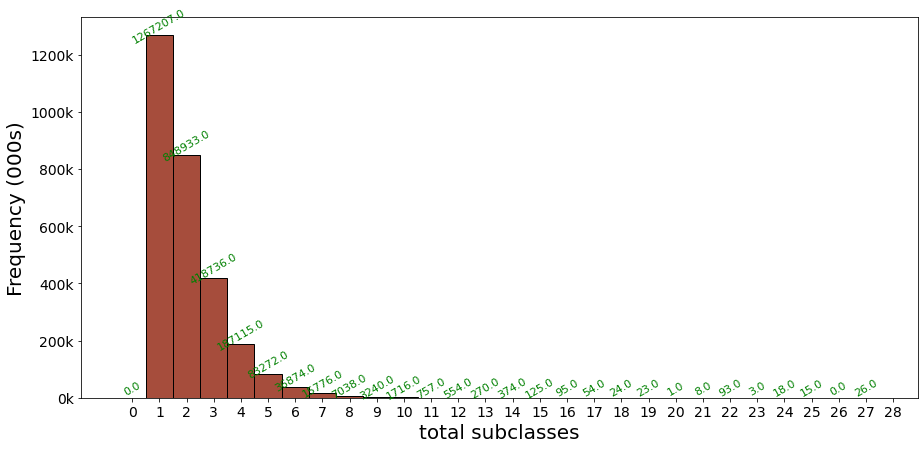

In [36]:
ax = df_cpc.iloc[0:,7].plot(kind='hist', bins=np.arange(29) - 0.5,figsize=(15,7),edgecolor='black', color='#a64d3c', fontsize=14)
ax.set_xlabel("total subclasses", fontsize=20)

ax.set_xticks(range(29))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11, rotation=30, color='green')

ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_of_subclasse_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_of_subclasse_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)    

#### counting title length 

In [37]:
df_cpc['Title_length'] = df_cpc['Title'].str.split().str.len() 

In [38]:
df_cpc.head()

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list,total_subclasses,Title_length
0,7473268,2009-01-06,Mating insertion instruments for spinal implan...,1. A method for inserting a main body assembly...,"A61B,A61K",114,"[A61B, A61K]",2,10
1,7473683,2009-01-06,Nonpolar thymidine analogs,1. A nucleoside analog comprising a halogenate...,"A61K,C07D,C07H",15,"[A61K, C07D, C07H]",3,3
2,7473560,2009-01-06,Steroid hormone analysis by mass spectrometry,1. A method for mass spectrometric analysis of...,"G01N,Y10T",82,"[G01N, Y10T]",2,6
3,7472455,2009-01-06,Portable hairstylists' station and method,1. A portable hair stylists' station having a ...,"A45D,A47L",164,"[A45D, A47L]",2,5
4,7474526,2009-01-06,Electronic apparatus,1. An electronic apparatus comprising: a case;...,"G06F,H01L",121,"[G06F, H01L]",2,2


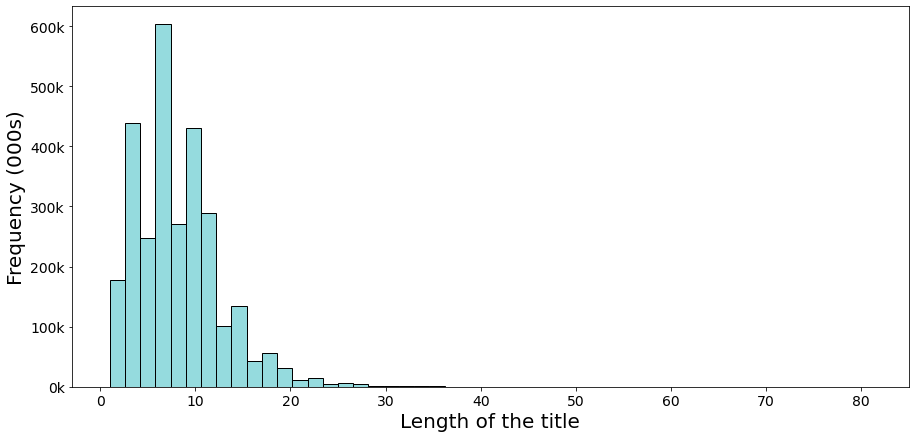

In [39]:
ax = df_cpc.iloc[0:,8].plot(kind='hist', bins=50, figsize=(15,7),edgecolor='black', color='#95dbde', fontsize=14)
ax.set_xlabel("Length of the title", fontsize=20)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_distribution_of_title_length_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_distribution_of_title_length_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  

In [40]:
print(df_cpc['Title_length'].min())
print(df_cpc['Title_length'].max())
print('Avergae lenth of title is: ' +str(df_cpc['Title_length'].mean()))

1
81
Avergae lenth of title is: 8.107435139278088


#### Counting claim lenght 

In [41]:
print(df_cpc['Claim_length'].min())
print(df_cpc['Claim_length'].max())
print('Avergae lenth of title is: ' +str(df_cpc['Claim_length'].mean()))

2
12161
Avergae lenth of title is: 161.88220503998994


In [42]:
df_cpc[df_cpc['Claim_length']==2]

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list,total_subclasses,Title_length
9278,7482464,2009-01-27,Processes for the preparation of S-(-)-amlodipine,1. (S)-(−)-amlodipine-hemi-L-tartrate-1/4-DMSO...,C07D,2,[C07D],1,6
15111,7488829,2009-02-10,"Diphenylazetidinones, process for their prepar...",1. 4-[5-(tert-butyldimethylsilanyloxy)-5-(4-fl...,"C07D,C07F",2,"[C07D, C07F]",2,12
45635,7517994,2009-04-14,Heterocyclic inhibitors of MEK and methods of ...,1. 2-(2-fluoro-4-iodophenylamino)-N-(2-hydroxy...,"A61K,C07D",2,"[A61K, C07D]",2,9
60454,7531654,2009-05-12,Process for producing substituted aniline comp...,"1. 1-(4,6-dimethoxypyrimidine-2-yl)-2-propanone.","C07C,C07D",2,"[C07C, C07D]",2,6
81771,7553976,2009-06-30,"Derivatives of 2-(iminomethyl)amino-phenyl, th...","1. 4-[3,5-bis(1,1-dimethylethyl)-4-hydroxyphen...",C07D,2,[C07D],1,15
97053,7569535,2009-08-04,"11-methyl-13-tridecanolide, 12-methyl-14-tetra...",1. 11-methyl-13-tridecanolide.,"C07C,C07D,C11B",2,"[C07C, C07D, C11B]",3,18
103829,7576200,2009-08-18,"Diphenylazetidinones, process for their prepar...",1. 1-(4-aminomethylphenyl)-3-[3-(4-fluoropheny...,"C07D,C07F",2,"[C07D, C07F]",2,12
140442,7612100,2009-11-03,"Anthranilamides, process for the production th...",1. N-[6-[[(cyclopropylmethyl)amino]carbonyl]-2...,"A01N,C07D",2,"[A01N, C07D]",2,12
181655,7655804,2010-02-02,Diketohydrazine derivative compounds and drugs...,"1. N-[(1S)-3-{(2Z)-2-[(4R)-3,4-dimethyl-1,3-th...","A61K,C07C,C07D,C07F,Y02A",2,"[A61K, C07C, C07D, C07F, Y02A]",5,12
193974,7667039,2010-02-23,"1,3-dihydro-imidazo [4,5-C] quinolin-2-ones as...",1. 2-Methyl-2-[4-(3-methyl-2-oxo-8-quinolin-3-...,C07D,2,[C07D],1,7


In [43]:
df_cpc.iloc[685681,3]

'1. A 2,3-dihydro-6-nitroimidazo[2,1-b]oxazole compound represented by the following general formula (1), an optically active form thereof, or a pharmacologically acceptable salt thereof: wherein R 1 represents a hydrogen atom, or a C1-C6 alkyl group, n represents an integer between 0 and 6, R wherein RRR represents a piperidyl group [wherein, on the piperidine ring, at least one phenoxy group may be substituted (wherein, on a phenyl ring of the phenoxy group, at least one selected from the group consisting of a halogen atom, a halogen substituted or unsubstituted C1-C6 alkyl group, and a halogen substituted or unsubstituted C1-C6 alkoxy group, may be substituted)], and R (a) a phenyl group (wherein, on a phenyl ring of the phenyl group, at least one piperidyl group may be substituted [(wherein, on the piperidine ring, at least one phenoxy group may be substituted (wherein, on a phenyl ring of the phenoxy group, at least one selected from the group consisting of a halogen atom, a halog

In [44]:
df_cpc[df_cpc['Claim_length']>800]

,ID,Date,Title,Claim,cpc_subclass,Claim_length,cpc_subclass_list,total_subclasses,Title_length
1187,7473699,2009-01-06,3-cyclyl-5-(nitrogen-containing 5-membered rin...,"1. A compound of the formula (I), or a pharmac...",C07D,849,[C07D],1,10
1803,7475069,2009-01-06,System and method for prioritizing websites du...,"1. A prioritization method, comprising: extrac...","G06F,Y10S",882,"[G06F, Y10S]",2,10
1915,7472728,2009-01-06,Electrically powered rapid sharpening cosmetic...,"1. A cosmetic pencil sharpener, comprising: a....",B43L,835,[B43L],1,7
2712,7475131,2009-01-06,"Network topology display method, management se...",1. A method for displaying a network topology ...,"G06F,H04L",910,"[G06F, H04L]",2,10
5427,7475519,2009-01-13,Self-adhered roof system and components,1. A method of making a self-adhered roof syst...,"E04D,Y10T",890,"[E04D, Y10T]",2,5
...,...,...,...,...,...,...,...,...,...
2868879,10366015,2019-07-30,Storage medium storing cache miss estimation p...,1. A computer-readable and non-transitory stor...,G06F,1025,[G06F],1,15
2869437,10366712,2019-07-30,Magnetic head for perpendicular magnetic recor...,1. A magnetic head for perpendicular magnetic ...,"G11B,Y10T",827,"[G11B, Y10T]",2,49
2870037,10368051,2019-07-30,3D-HEVC inter-frame information hiding method ...,1. A 3D-HEVC (Three Dimensional High Efficienc...,H04N,954,[H04N],1,9
2870800,10364940,2019-07-30,Sealed and thermally insulated tank fitted wit...,1. A sealed and thermally insulating tank inte...,F17C,801,[F17C],1,9


In [45]:
df_cpc_lt_k = df_cpc[df_cpc['Claim_length']<801]

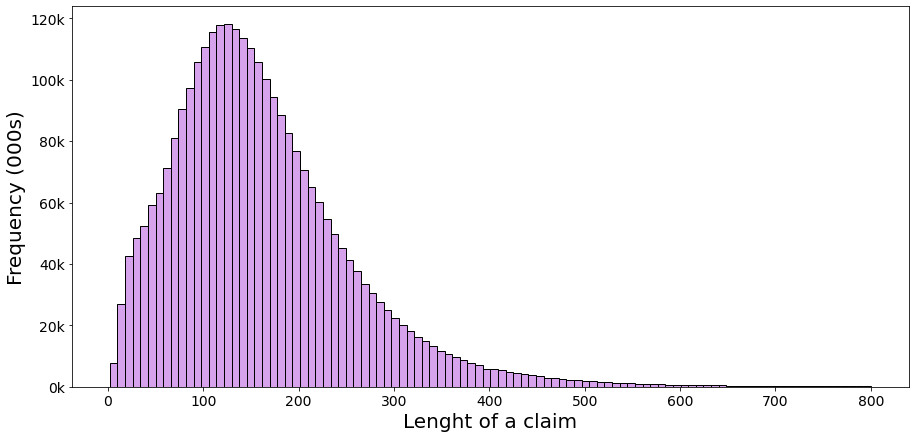

In [46]:
ax = df_cpc_lt_k.iloc[0:,5].plot(kind='hist', bins=100, figsize=(15,7), edgecolor='black', color='#d5a2eb', fontsize=14)

ax.set_xlabel("Lenght of a claim", fontsize=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_distribution_of_claim_length_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/g3m_frequency_distribution_of_claim_length_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  